In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as opt
import numpy as np

In [3]:
data1 = pd.read_csv('data/Ch 1_600nm_0.03.csv', sep=';', encoding='cp1251')
data2 = pd.read_csv('data/Ch 2_600nm_0.03.csv', sep=';', encoding='cp1251')

In [4]:
data1.head(5)

,мВ,мА
0,0.009817,1.963400e-07
1,0.009993,1.998600e-07
2,0.010579,2.115800e-07
3,0.010600,2.120100e-07
4,0.010683,2.136700e-07


In [5]:
data2.head(5)

,мВ,мА
0,0.008535,1.706900e-07
1,0.008931,1.786300e-07
2,0.009069,1.813900e-07
3,0.009083,1.816600e-07
4,0.009192,1.838400e-07


In [6]:
data1 = data1['мВ']
data2 = data2['мВ']

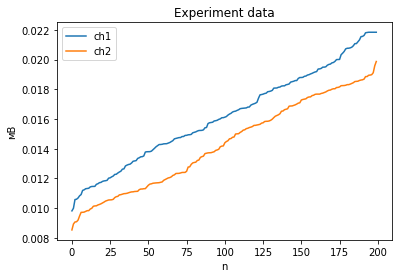

In [150]:
data1.plot(label='ch1')
data2.plot(label='ch2')
plt.title('Experiment data')
plt.xlabel('n')
plt.ylabel('мВ')
plt.legend()

In [20]:
ksi = 1e-4

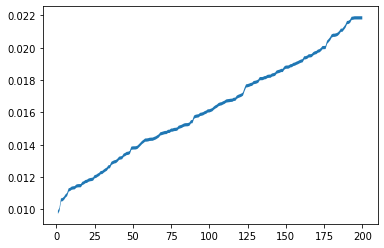

In [135]:
plt.fill_between(data1.index + 1, data1 - ksi, data1 + ksi)

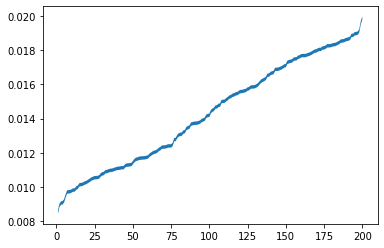

In [151]:
plt.fill_between(data2.index + 1, data2 - ksi, data2 + ksi)

In [109]:
def load_processed(filename):
    A = 0
    B = 0
    w = []
    with open(filename) as f:
        A, B = [float(t) for t in f.readline().split()]
        for line in f.readlines():
            w.append(float(line))
    return A, B, w

In [112]:
A1, B1, w1 = load_processed('data/Ch1.txt')
A2, B2, w2 = load_processed('data/Ch2.txt')

Text(0, 0.5, 'мВ')

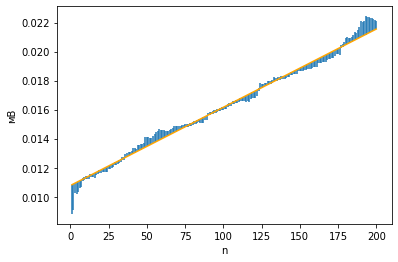

In [137]:
for i in data1.index:
    plt.vlines(i + 1, data1[i] + w1[i] * ksi, data1[i] - w1[i] * ksi)
plt.plot(np.arange(1, 201), A1 + B1 * (np.arange(1, 201)), label='lsm', color='orange')
plt.xlabel('n')
plt.ylabel('мВ')

Text(0, 0.5, 'мВ')

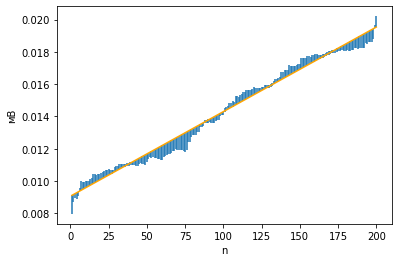

In [141]:
for i in data2.index:
    plt.vlines(i + 1, data2[i] + w2[i] * ksi, data2[i] - w2[i] * ksi)
plt.plot(np.arange(1, 201), A2 + B2 * (np.arange(1, 201)), label='lsm', color='orange')
plt.xlabel('n')
plt.ylabel('мВ')

(array([132.,  42.,  13.,   4.,   4.,   3.,   0.,   0.,   1.,   1.]),
 array([ 0.999504 ,  1.9056136,  2.8117232,  3.7178328,  4.6239424,
         5.530052 ,  6.4361616,  7.3422712,  8.2483808,  9.1544904,
        10.0606   ]),
 <BarContainer object of 10 artists>)

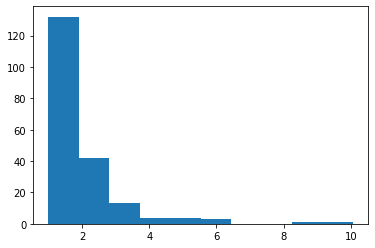

In [139]:
plt.hist(w1)

(array([71., 27., 41., 17., 16., 13.,  9.,  2.,  1.,  3.]),
 array([1.      , 1.480629, 1.961258, 2.441887, 2.922516, 3.403145,
        3.883774, 4.364403, 4.845032, 5.325661, 5.80629 ]),
 <BarContainer object of 10 artists>)

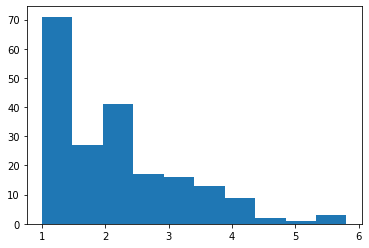

In [140]:
plt.hist(w2)

Text(0, 0.5, 'мВ')

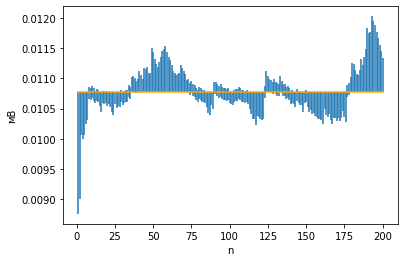

In [188]:
data1_fixed = [y - (i + 1) * B1 for i, y in enumerate(data1)]
for i in data1.index:
    plt.vlines(i + 1, data1_fixed[i] + w1[i]*ksi, data1_fixed[i] - w1[i]*ksi)
plt.plot(np.arange(1, 201), [A1]*200, label='lsm', color='orange')
plt.xlabel('n')
plt.ylabel('мВ')

Text(0, 0.5, 'мВ')

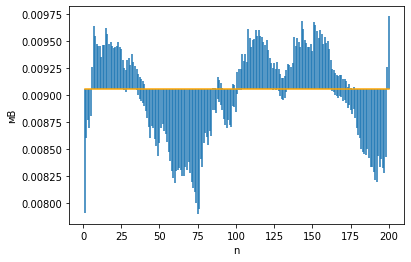

In [189]:
data2_fixed = [y - (i + 1) * B2 for i, y in enumerate(data2)]
for i in data2.index:
    plt.vlines(i + 1, data2_fixed[i] + w2[i]*ksi, data2_fixed[i] - w2[i]*ksi)
plt.plot(np.arange(1, 201), [A2]*200, label='lsm', color='orange')
plt.xlabel('n')
plt.ylabel('мВ')

(array([ 2.,  0.,  0.,  3., 29., 70., 44., 35., 10.,  7.]),
 array([0.00976316, 0.00992676, 0.01009036, 0.01025396, 0.01041756,
        0.01058117, 0.01074477, 0.01090837, 0.01107197, 0.01123557,
        0.01139917]),
 <BarContainer object of 10 artists>)

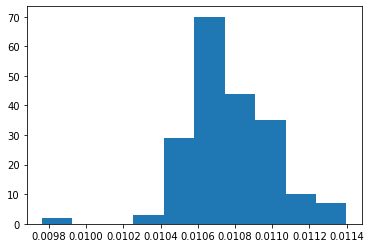

In [155]:
plt.hist(data1_fixed)

(array([ 4.,  9., 24., 17., 21., 17., 17., 31., 46., 14.]),
 array([0.00847654, 0.00856816, 0.00865978, 0.0087514 , 0.00884303,
        0.00893465, 0.00902627, 0.00911789, 0.00920951, 0.00930114,
        0.00939276]),
 <BarContainer object of 10 artists>)

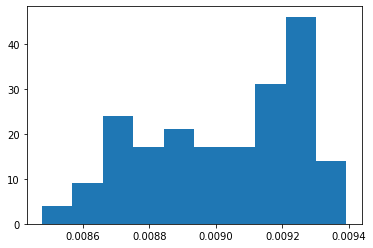

In [156]:
plt.hist(data2_fixed)

In [191]:
data1_fixed_int = [[y - w1[i]*ksi, y + w1[i]*ksi] for i, y in enumerate(data1_fixed)]
data2_fixed_int = [[y - w2[i]*ksi, y + w2[i]*ksi] for i, y in enumerate(data2_fixed)]

In [214]:
def countJaccar(R):
    data1_new = [[data1_fixed_int[i][0] * R, data1_fixed_int[i][1] * R] for i in range(len(data1_fixed_int))]
    all_data = data1_new + data2_fixed_int
    min_inc = list(all_data[0])
    max_inc = list(all_data[0])
    for interval in all_data:
        min_inc[0] = max(min_inc[0], interval[0])
        min_inc[1] = min(min_inc[1], interval[1])
        max_inc[0] = min(max_inc[0], interval[0])
        max_inc[1] = max(max_inc[1], interval[1])
    JK = (min_inc[1] - min_inc[0]) / (max_inc[1] - max_inc[0])
    return JK

In [ ]:
R_interval = np.linspace(0.7, 1, 1000)
Jaccars = []
for R in R_interval:
    Jaccars.append(countJaccar(R))

optimal_x = opt.fmin(lambda x: -countJaccar(x), 0.85, xtol=1e-11)
min1 = opt.root(countJaccar, 0.8, tol=1e-11)     
max1 = opt.root(countJaccar, 0.9, method='lm', tol=1e-11) 

Text(0.5, 1.0, 'Jaccard vs R')

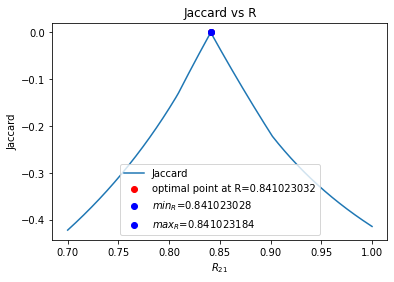

In [210]:
plt.plot(R_interval, Jaccars, label="Jaccard", zorder=1)
plt.scatter(optimal_x[0], countJaccar(optimal_x[0]), label=f"optimal point at R={round(optimal_x[0], 9)}",color="r")
plt.scatter(min1.x, countJaccar(min1.x), label=f"$min_R$={round(min1.x[0],9)}", color="b", zorder=2)
plt.scatter(max1.x, countJaccar(max1.x), label=f"$max_R$={round(max1.x[0],9)}", color="b", zorder=2)
plt.legend()
plt.xlabel('$R_{21}$')
plt.ylabel('Jaccard')
plt.title('Jaccard vs R')

Text(0.5, 1.0, 'Histogram of combined data with optimal R21')

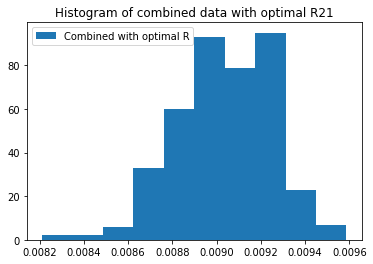

In [220]:
data1_new = [[data1_fixed_int[i][0] * optimal_x[0], data1_fixed_int[i][1] * optimal_x[0]] for i in range(len(data1_fixed_int))]
all_data = data1_new + data2_fixed_int
plt.hist([(inter[0] + inter[1]) / 2 for inter in all_data], label="Combined with optimal R")
plt.legend()
plt.title('Histogram of combined data with optimal R21')